In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np

# save('myData.mat','vhist','zhist','vphist','zphist','hist_pos','T', "ktime", "time_hist")
mat = spio.loadmat('9vehicles/myData.mat', squeeze_me=True)

In [221]:

print(type(mat))
vhist = mat['vhist']  # structures need [()]
vphist = mat['vphist']
hist_pos = mat['hist_pos']
zhist = mat['zhist']
zphist = mat['zphist']
ktime = mat['ktime']
time_hist = mat['time_hist']
T_total = mat['End']
#  ----------------------------------------------------------------------------
horizon = hist_pos.shape[1]
robots = hist_pos.shape[0]
index_array =['robot ' + str(i+1) for i in range(robots)]


<class 'dict'>


In [222]:

df_vel = pd.DataFrame(vhist[:,:-1], columns = np.arange(1,horizon))
df_zel= pd.DataFrame(zhist[:,:-1], columns = np.arange(1,horizon))
df_pos = pd.DataFrame(hist_pos[:,:-1], columns = np.arange(1,horizon))
df_time = pd.DataFrame(time_hist, columns = np.arange(1,horizon))
df_vel['agent'] = index_array
df_zel['agent'] = index_array
df_pos['agent'] = index_array
df_time['agent'] = index_array
# df.index.names = ['agents']
# df_vel.index.names = ['agents']
# df_vel.reset_index(drop=True)
# index = pd.Index(index_array, name = 'agent') #pd.Index(np.arange(1,robots+1))
# df = df.set_index(index)
print('df_time', df_time)
print(df_vel)


df_time            1         2         3         4         5         6         7  \
0   0.121705  0.389501  0.620298  0.267060  0.239635  0.320487  0.269882   
1   0.350114  0.517443  0.472722  0.501457  0.293968  0.245899  0.345596   
2   0.187796  0.162821  0.198628  0.155306  0.141522  0.124225  0.131493   
3   0.355099  0.234871  0.272305  0.258219  0.293037  0.196082  0.242984   
4   0.178467  0.105488  0.244456  0.121947  0.166730  0.269008  0.258600   
5   0.236557  0.181931  0.211656  0.199432  0.168939  0.156090  0.154203   
6   0.231709  0.205622  0.174207  0.172834  0.172116  0.210701  0.512835   
7   0.136327  0.172369  0.155450  0.135171  0.251400  0.154109  0.127921   
8   0.159732  0.192112  0.204378  0.175084  0.161612  0.197284  0.156550   
9   0.127651  0.176153  0.109115  0.116319  0.090458  0.073913  0.104192   
10  0.130395  0.378139  0.481831  0.401937  0.270091  0.170364  0.211528   
11  0.327660  0.231289  0.185112  0.157024  0.324611  0.244167  0.280169   

   

In [223]:
vel_melt = df_vel.melt(id_vars=['agent'], var_name='k', value_name='Vel')
zel_melt = df_zel.melt(id_vars=['agent'], var_name='k', value_name='Zel')
pos_melt = df_pos.melt(id_vars=['agent'], var_name='k', value_name='Pos')
time_melt = df_time.melt(id_vars=['agent'], var_name='k', value_name='d_time')
df_data = vel_melt.merge(zel_melt, on=['agent', 'k'], how='inner') \
                .merge(pos_melt, on=['agent', 'k'], how='inner')\
                .merge(time_melt, on=['agent', 'k'], how='inner')
df_data

,agent,k,Vel,Zel,Pos,d_time
0,robot 1,1,10.0,6,0.000000,0.121705
1,robot 2,1,20.0,1,-40.000000,0.350114
2,robot 3,1,10.0,3,-10.000000,0.187796
3,robot 4,1,20.0,5,-10.000000,0.355099
4,robot 5,1,10.0,2,-30.000000,0.178467
...,...,...,...,...,...,...
595,robot 8,50,30.0,3,590.000000,0.083550
596,robot 9,50,20.0,3,397.998214,0.082276
597,robot 10,50,50.0,3,977.200000,0.049393
598,robot 11,50,15.0,3,307.286111,0.084643


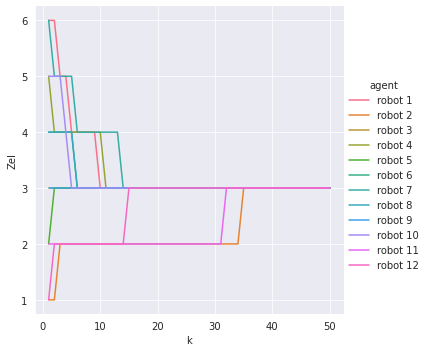

In [224]:
# tiempos = database[]
sns.relplot( x = 'k', y= 'Zel' ,data = df_data, kind='line' , hue = 'agent')
plt.show()

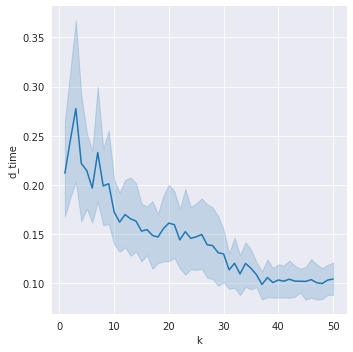

In [225]:
sns.relplot( x = 'k', y= 'd_time' ,data = df_data, kind='line' )
plt.show()

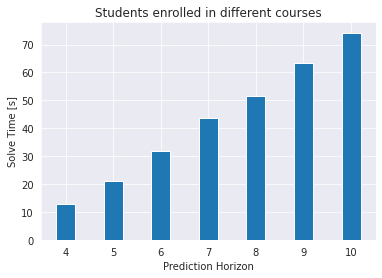

In [226]:
range_horizon = [4,5,6,7,8,9,10]
range_vehicles = [2,3,4,5,6,7,8,9,10,11,12]

# time of whole time vs horizon
sim_time = []
k_time = []
for i in range_horizon:
    mat = spio.loadmat(f'11vehicles/datasave/data_11v_{i}N.mat', squeeze_me=True)
    sim_time.append(mat['End'])
    k_time.append(mat['ktime'])

fig = plt.figure()

# creating the bar plot
plt.bar(range_horizon, sim_time, width = 0.4)
plt.xlabel("Prediction Horizon")
plt.ylabel("Solve Time [s]")
plt.title("Students enrolled in different courses")
plt.show()
# sim_time

<AxesSubplot:xlabel='horizon', ylabel='time'>

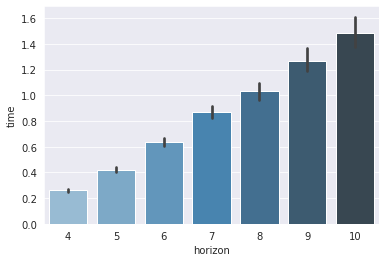

In [227]:
df_ktime = pd.DataFrame(k_time)
df_ktime['horizon'] = range_horizon
ktime_melt = df_ktime.melt(id_vars=['horizon'], var_name='k', value_name='time')
ktime_melt
sns.barplot(x="horizon", y="time", data=ktime_melt, palette='Blues_d')

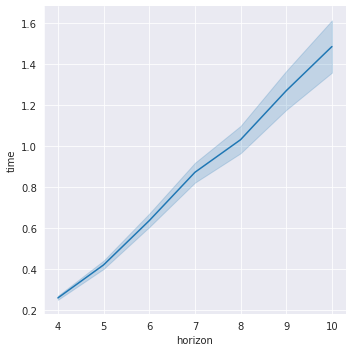

In [228]:
sns.relplot( x="horizon", y="time", data=ktime_melt, kind='line' )
plt.show()

In [229]:
# plot descentraliced and centralized times
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=1)

agent
robot 1     0.145063
robot 10    0.049904
robot 11    0.188391
robot 12    0.140698
robot 2     0.221701
robot 3     0.140279
robot 4     0.177006
robot 5     0.177488
robot 6     0.154380
robot 7     0.131223
robot 8     0.104402
robot 9     0.125265
dtype: float64

In [230]:
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=0)

k
1     0.211934
2     0.245645
3     0.277513
4     0.221816
5     0.214510
6     0.196861
7     0.232996
8     0.199006
9     0.201237
10    0.172442
11    0.162241
12    0.169936
13    0.165582
14    0.163193
15    0.153148
16    0.154606
17    0.148786
18    0.147028
19    0.155735
20    0.161271
21    0.159588
22    0.144248
23    0.152576
24    0.145737
25    0.147321
26    0.149677
27    0.139250
28    0.138369
29    0.131158
30    0.129895
31    0.113740
32    0.120440
33    0.109627
34    0.120291
35    0.115267
36    0.108810
37    0.098937
38    0.105907
39    0.100843
40    0.103445
41    0.102261
42    0.104257
43    0.102315
44    0.102190
45    0.102031
46    0.103838
47    0.100690
48    0.099840
49    0.103376
50    0.104424
dtype: float64

In [231]:
range_horizon = [4, 5, 6, 7, 8, 9, 10]
range_vehicles = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

time = []
k_time = []
for i in range_horizon:

    sim_time = []
    simk_time = []
    for j in range_vehicles:
        mat = spio.loadmat(f'{j}vehicles/datasave/data_{j}v_{i}N.mat', squeeze_me=True)
        sim_time.append(mat['End'])
        mean_time = np.mean(mat['ktime'])
        simk_time.append(mean_time)
    time.append(sim_time)
    k_time.append((simk_time))
time

[[1.116883,
  1.925147,
  3.713156,
  4.39191,
  6.505492,
  7.615661,
  8.985592,
  10.837327,
  11.58966,
  13.002399,
  13.96048],
 [1.115235,
  2.360534,
  5.549121,
  6.338701,
  9.756405,
  12.097954,
  15.024055,
  17.583603,
  18.482136,
  21.044771,
  22.965795],
 [1.359459,
  2.887934,
  7.4681,
  9.203758,
  14.6147,
  17.658442,
  23.263703,
  26.346878,
  27.396372,
  31.825151,
  36.965058],
 [1.730342,
  3.705078,
  9.898246,
  12.804113,
  19.275704,
  23.482406,
  31.124359,
  35.007906,
  36.927376,
  43.600612,
  48.067606],
 [1.818526,
  4.606696,
  12.673226,
  17.155874,
  25.197931,
  29.627185,
  36.300665,
  43.425987,
  45.766526,
  51.546981,
  59.163065],
 [2.223633,
  5.326034,
  15.445589,
  21.583756,
  31.262471,
  37.589018,
  46.111214,
  53.066256,
  55.859289,
  63.476256,
  72.707638],
 [2.713374,
  6.785173,
  17.894784,
  25.639676,
  39.382263,
  45.464804,
  54.529339,
  61.541275,
  66.569329,
  74.233762,
  87.795017]]

In [232]:
df_time = pd.DataFrame(time, columns=range_vehicles)
df_time['Horizon'] = range_horizon
time_melt = df_time.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# time_melt
df_ktime_mean = pd.DataFrame(k_time)
df_ktime_mean['Horizon'] = range_horizon
ktime_melt = df_ktime_mean.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# ktime_melt

In [233]:
time_melt

,Horizon,NumberVehicles,time
0,4,2,1.116883
1,5,2,1.115235
2,6,2,1.359459
3,7,2,1.730342
4,8,2,1.818526
...,...,...,...
72,6,12,36.965058
73,7,12,48.067606
74,8,12,59.163065
75,9,12,72.707638


In [234]:
times_simulation = time_melt.merge(ktime_melt, on=['Horizon', 'NumberVehicles'], how='inner', suffixes=('_Centralized', '_Descentralized'))
times_simulation

,Horizon,NumberVehicles,time_Centralized,time_Descentralized
0,4,2,1.116883,0.074248
1,5,2,1.115235,0.110976
2,6,2,1.359459,0.149357
3,7,2,1.730342,0.197960
4,8,2,1.818526,0.253443
...,...,...,...,...
58,6,10,27.396372,0.739297
59,7,10,36.927376,0.961348
60,8,10,45.766526,1.183242
61,9,10,55.859289,1.454151


In [235]:
times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')

,Horizon,NumberVehicles,Method,time
0,4,2,time_Centralized,1.116883
1,5,2,time_Centralized,1.115235
2,6,2,time_Centralized,1.359459
3,7,2,time_Centralized,1.730342
4,8,2,time_Centralized,1.818526
...,...,...,...,...
121,6,10,time_Descentralized,0.739297
122,7,10,time_Descentralized,0.961348
123,8,10,time_Descentralized,1.183242
124,9,10,time_Descentralized,1.454151


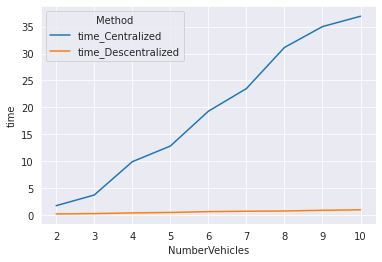

In [241]:
plot_data = times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')
sns.lineplot(x='NumberVehicles', y='time', data = plot_data[plot_data['Horizon']==7], hue='Method')
plt.show()

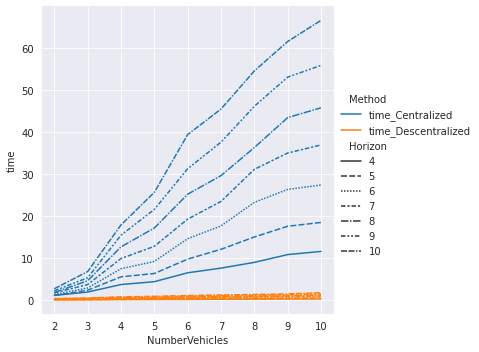

In [237]:
sns.relplot( x = 'NumberVehicles', y= 'time' ,data = plot_data, kind='line' , hue = 'Method', style="Horizon")
plt.show()

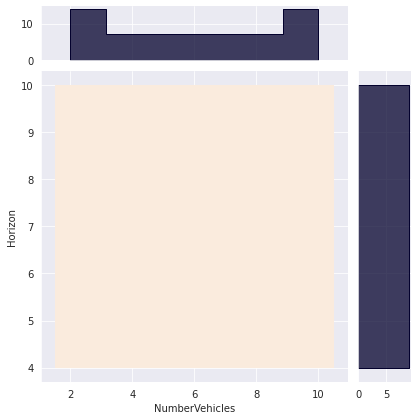

In [238]:
# Load the planets dataset and initialize the figure

g = sns.JointGrid(data=times_simulation, x="NumberVehicles", y="Horizon", marginal_ticks=True)


# Add the joint and marginal histogram plots
g.plot_joint(sns.histplot, discrete=(True, False),
    cmap="rocket", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

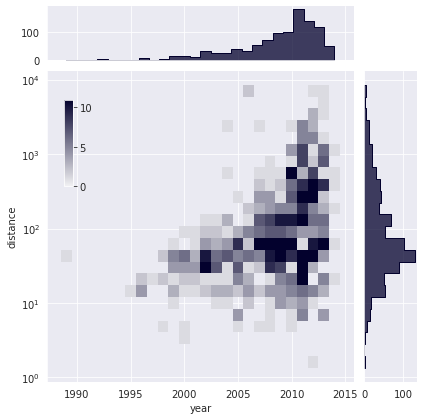

In [239]:
# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [240]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008
